In [1]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TME 9 FDMS, problèmes de bandits

In [2]:
f = open("./CTR.txt")
ctr=[]
for i in f.readlines():
    line = i.split(':')
    ctr.append([int(line[0]),[float(i) for i in line[1].split(';')],[float(i) for i in line[2][:-2].split(';')]]) 

In [3]:
ctr[0]

[0,
 [0.74837091377052,
  0.8352077827766918,
  0.07669895743095312,
  0.17243898920810596,
  0.14344585283799294],
 [0.10341905704918021,
  0.19069778281037159,
  0.0,
  0.10240139196802925,
  0.0363124254124334,
  0.07456195450906297,
  0.2347024151796051,
  0.0,
  0.0,
  0.07857372422425657]]

In [4]:
nb_annonceurs=len(ctr[0][2])
nb_annonceurs

10

In [5]:
random.randint(0,nb_annonceurs-1)

5

In [6]:
x = [0.2,.4,.7,1.2]

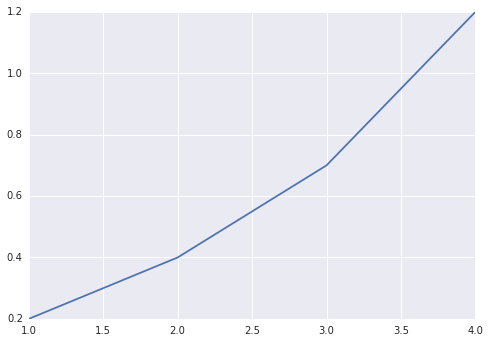

In [7]:
plt.plot(np.array(range(len(x)))+1,x)
plt.show()

In [8]:
def baseRandom(ctr):
    trace=[]
    score=[]
    annonceur=[]
    for a in ctr:
        id=random.randint(0,nb_annonceurs-1)
        score.append(a[2][id])
        annonceur.append(id)
        trace.append(np.array(score).sum())
    return np.array(score),np.array(annonceur),trace

In [9]:
def baseStaticBest(ctr):
    sum=np.zeros(len(ctr[0][2]))
    for a in ctr:
        sum+=np.array(a[2])
    argmax=np.array(sum).argmax()
    annonceur = np.ones(len(ctr))*argmax
    score = np.array([i[2][argmax] for i in ctr])
    return score,annonceur

In [10]:
def baseStaticBestCum(ctr):
    sum=np.zeros(len(ctr[0][2]))
    annonceur = []
    score = []
    trace=[]
    for a in ctr:
        sum+=np.array(a[2])
        idmax = np.array(sum).argmax()
        annonceur.append(idmax)
        score.append(a[2][idmax])
        trace.append(np.array(score).sum())
    return np.array(score),np.array(annonceur),trace

In [11]:
def baseOptimal(ctr):
    score=[]
    annonceur=[]
    trace=[]
    for a in ctr:
        id=np.array(a[2]).argmax()
        score.append(a[2][id])
        annonceur.append(id)
        trace.append(np.array(score).sum())
    return np.array(score),np.array(annonceur),trace

In [59]:
score,annonceur,traceRandom = baseRandom(ctr)
score.sum()

400.84345747961373

In [60]:
score,annonceur = baseStaticBest(ctr)
score.sum()

1339.6350310465791

In [61]:
score,annonceur,traceStaticBest = baseStaticBestCum(ctr)
score.sum()

1339.8983608672656

In [62]:
score,annonceur,traceOptimal = baseOptimal(ctr)
score.sum()

1532.0032357358157

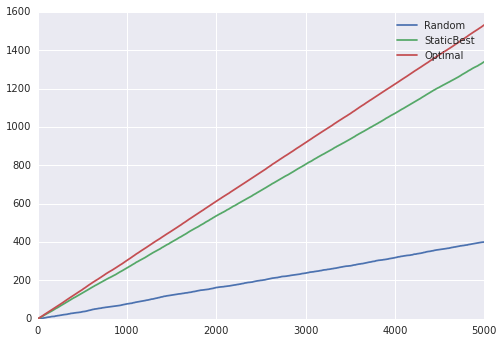

In [63]:
plt.plot(traceRandom, label = "Random")
plt.plot(traceStaticBest, label = "StaticBest")
plt.plot(traceOptimal, label = "Optimal")
plt.legend()
plt.show()

# UCB

Developpement de l'article UCB

In [77]:
def UCB(ctr):
    score=[]
    annonceur=[]
    trace=[]
    
    nbAds=len(ctr[0][2])
    weights= np.zeros(nbAds)
    arrayS=np.zeros(nbAds)
    t=0
    #init------------
    for it in np.arange(nbAds):
        t+=1
        arrayS[it]+=1
        weights[it]+=ctr[it][2][it]
    
    
    #algo
    for a in ctr:
        #calcul du argmax de literation precedente
        mu=np.zeros(nbAds)
        for it in np.arange(nbAds):
            mu[it]+=weights[it]/arrayS[it]+np.square((2*np.log(t))/arrayS[it])
        argmax = np.argmax(np.array(mu))
        
        #maj des valeurs
        t+=1
        arrayS[argmax]+=1
        weights[argmax]+=a[2][argmax]
        
        score.append(a[2][argmax])
        annonceur.append(argmax)
        trace.append(np.array(score).sum())
    return np.array(score),np.array(annonceur),trace
        
 
    

In [78]:
#calcul des scores pour UCB
score,annonceur,UCB = UCB(ctr)
score.sum()

1272.2319832867825

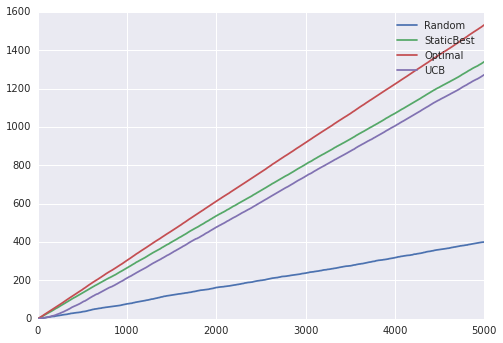

In [79]:
plt.plot(traceRandom, label = "Random")
plt.plot(traceStaticBest, label = "StaticBest")
plt.plot(traceOptimal, label = "Optimal")
plt.plot(UCB, label = "UCB")
plt.legend()
plt.show()
#UCB cest mauvais :( ou je suis mauvais

# Lin UCB

In [ ]:
def linUCB(ctr):
    d = nb_annonceurs
    l = []
    A = []
    for i in d:
        A.append([np.identity(d), np.zeros(d)])
        
    for t in len(ctr):
        for idxa,a in enumerate(t[2]):
            theta=A[idxa][0].dot(A[idxa][1])

In [81]:
np.identity(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [140]:
np.identity(10).dot(np.zeros(10))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [136]:
np.zeros([2,2])

array([[ 0.,  0.],
       [ 0.,  0.]])